In [111]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [112]:
df = pd.read_csv('input_large.txt',sep=',')

In [113]:
df.head()

,process_id,file_size,mem_usage,page_vaults,page_file_peak_usage,self/Non-Self
0,L,L,L,L,L,1
1,H,L,L,L,L,1
2,M,L,L,L,L,0
3,VL,L,L,L,L,1
4,VH,L,L,L,L,0


In [114]:
X = df.iloc[: , [0 , 1 , 2 , 3 , 4]].values
labelencoder_x=LabelEncoder()
for n in range(0,5):
    X[:,n]=labelencoder_x.fit_transform(X[:,n])
onehotencoder_x = OneHotEncoder(categorical_features=[0])
X = onehotencoder_x.fit_transform(X).toarray()
X = X[: , 1:]
onehotencoder_x = OneHotEncoder(categorical_features=[4])
X = onehotencoder_x.fit_transform(X).toarray()
X = X[: , 1:]
onehotencoder_x = OneHotEncoder(categorical_features=[8])
X = onehotencoder_x.fit_transform(X).toarray()
X = X[: , 1:]
onehotencoder_x = OneHotEncoder(categorical_features=[12])
X = onehotencoder_x.fit_transform(X).toarray()
X = X[: , 1:]
onehotencoder_x = OneHotEncoder(categorical_features=[16])
X = onehotencoder_x.fit_transform(X).toarray()
X = X[: , 1:]
y = df.iloc[: , 5].values

In [115]:
X

array([[ 1.,  0.,  0., ...,  0.,  0.,  0.],
       [ 1.,  0.,  0., ...,  0.,  0.,  0.],
       [ 1.,  0.,  0., ...,  1.,  0.,  0.],
       ..., 
       [ 0.,  0.,  1., ...,  0.,  0.,  0.],
       [ 0.,  0.,  1., ...,  0.,  0.,  0.],
       [ 0.,  0.,  1., ...,  0.,  0.,  0.]])

In [116]:
y

array([1, 1, 0, ..., 0, 1, 1])

In [123]:
qq = np.arange(1 , 100 , 1)
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size = 0.25)

In [124]:
acc = []
for x in qq:
    classifier = DecisionTreeClassifier(criterion='gini',max_depth=x,random_state=0)
    classifier.fit(X_train,y_train)
    y_pred = classifier.predict(X_test)
    acc.append(accuracy_score(y_test,y_pred))

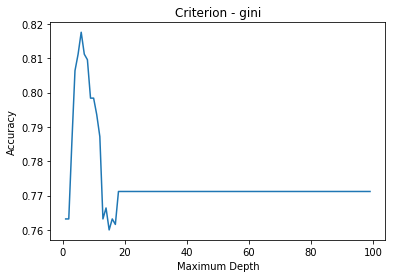

In [125]:
plt.title('Criterion - gini')
plt.xlabel('Maximum Depth')
plt.ylabel('Accuracy')
plt.plot(qq , acc)
plt.show()

In [126]:
acc = []
for x in qq:
    classifier = DecisionTreeClassifier(criterion='entropy',max_depth=x,random_state=0)
    classifier.fit(X_train,y_train)
    y_pred = classifier.predict(X_test)
    acc.append(accuracy_score(y_test,y_pred))

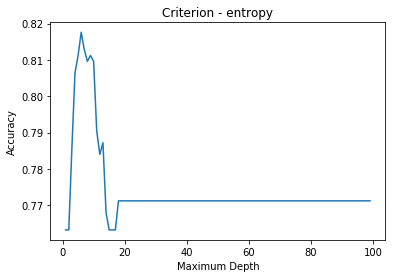

In [127]:
plt.title('Criterion - entropy')
plt.xlabel('Maximum Depth')
plt.ylabel('Accuracy')
plt.plot(qq , acc)
plt.show()

In [128]:
acc = []
for x in qq:
    classifier = DecisionTreeClassifier(criterion='gini',max_depth=x,min_samples_leaf=10,random_state=0)
    classifier.fit(X_train,y_train)
    y_pred = classifier.predict(X_test)
    acc.append(accuracy_score(y_test,y_pred))

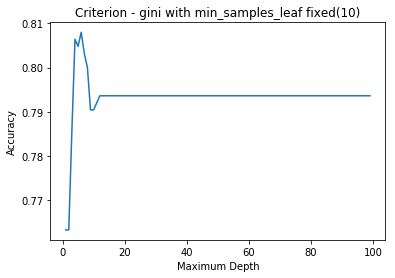

In [129]:
plt.title('Criterion - gini with min_samples_leaf fixed(10)')
plt.xlabel('Maximum Depth')
plt.ylabel('Accuracy')
plt.plot(qq , acc)
plt.show()

In [130]:
acc = []
for x in qq:
    classifier = DecisionTreeClassifier(criterion='entropy',max_depth=x,min_samples_leaf=10,random_state=0)
    classifier.fit(X_train,y_train)
    y_pred = classifier.predict(X_test)
    acc.append(accuracy_score(y_test,y_pred))

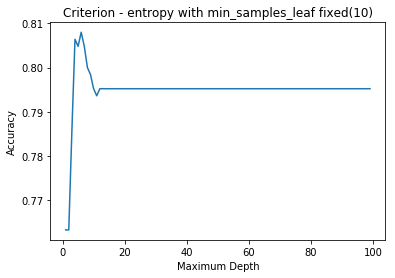

In [131]:
plt.title('Criterion - entropy with min_samples_leaf fixed(10)')
plt.xlabel('Maximum Depth')
plt.ylabel('Accuracy')
plt.plot(qq , acc)
plt.show()

In [132]:
acc = []
for x in qq:
    classifier = DecisionTreeClassifier(criterion='gini',max_depth=x,min_samples_leaf=5,random_state=0)
    classifier.fit(X_train,y_train)
    y_pred = classifier.predict(X_test)
    acc.append(accuracy_score(y_test,y_pred))

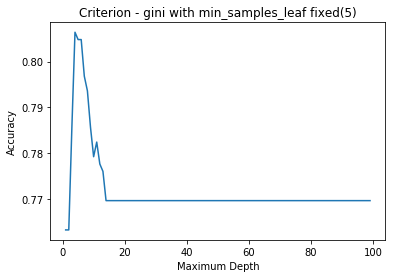

In [133]:
plt.title('Criterion - gini with min_samples_leaf fixed(5)')
plt.xlabel('Maximum Depth')
plt.ylabel('Accuracy')
plt.plot(qq , acc)
plt.show()

In [134]:
acc = []
for x in qq:
    classifier = DecisionTreeClassifier(criterion='entropy',max_depth=x,min_samples_leaf=5,random_state=0)
    classifier.fit(X_train,y_train)
    y_pred = classifier.predict(X_test)
    acc.append(accuracy_score(y_test,y_pred))

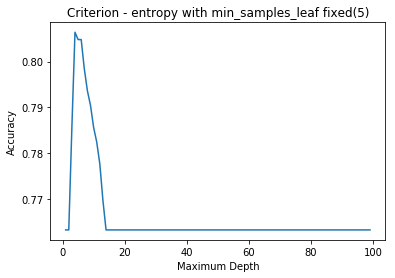

In [135]:
plt.title('Criterion - entropy with min_samples_leaf fixed(5)')
plt.xlabel('Maximum Depth')
plt.ylabel('Accuracy')
plt.plot(qq , acc)
plt.show()